In [0]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# [25 pts] A Toy Example: Decision Boundary and Conditional Independence Assumption

### Gaussian Distributed Data fits better to Gaussian Naive Bayesian rather than Logistic Regression, unfortunately that is not the case most of the time.
Now, imagine we have two artificial dataset. Both are drawn from Gaussian distribution. One of the dataset is with standard deviation 1 and the other is 5. Each cluster is conditionally independent from each other.

make_blobs function samples data points from gaussian distribution.

In [0]:
from sklearn.datasets import make_blobs
data1, label1 = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=1, random_state=1)# code comes here
data2, label2 = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=5, random_state=1)# code comes here

Let's split the datasets into train and test.

In [0]:
(train_x1, val_x1, train_y1, val_y1) = train_test_split(data1, label1, test_size=0.2)# code comes here
(train_x2, val_x2, train_y2, val_y2) = train_test_split(data2, label2, test_size=0.2)# code comes here

Plot the first dataset with standard deviation 1.

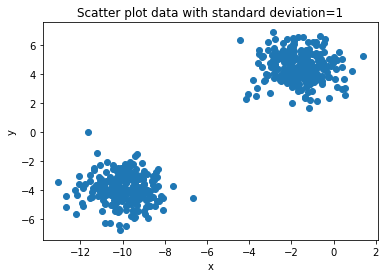

In [57]:
plt.scatter(data1[:,0], data1[:,1])
plt.title('Scatter plot data with standard deviation=1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Plot the first dataset with standard deviation 5.

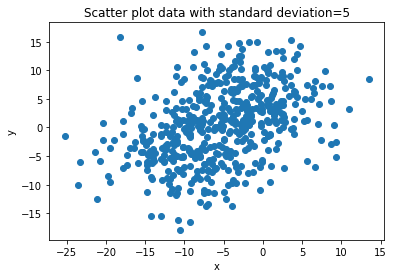

In [58]:
plt.scatter(data2[:,0], data2[:,1])
plt.title('Scatter plot data with standard deviation=5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Train a Gaussian Naive Bayesian and Logistic Regression with the 1st dataset.

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(train_x1, train_y1)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_x1, train_y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Perfect Decision Boundary

In [61]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(val_y1,GNB.predict(val_x1)))
print("Confusion matrix for Naive Bayesian:")
print(confusion_matrix(val_y1, GNB.predict(val_x1)))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        51

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion matrix for Naive Bayesian:
[[49  0]
 [ 0 51]]


In [62]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(val_y1,clf.predict(val_x1)))
print("Confusion matrix for Logistic Regression:")
print(confusion_matrix(val_y1, clf.predict(val_x1)))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        51

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion matrix for Logistic Regression:
[[49  0]
 [ 0 51]]


### Both algorithm perfectly separate two data clusters for 1st dataset with standard deviation 1. The data points are linearly separable.

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(train_x2, train_y2)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_x2, train_y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
# Predict
print("Classification Report for Naive Bayesian:")
print(classification_report(val_y2,GNB.predict(val_x2)))
print("Confusion matrix for Naive Bayesian:")
print(confusion_matrix(val_y2, GNB.predict(val_x2)))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        57
           1       0.80      0.95      0.87        43

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.88      0.88       100

Confusion matrix for Naive Bayesian:
[[47 10]
 [ 2 41]]


In [66]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(val_y2,clf.predict(val_x2)))
print("Confusion matrix for Logistic Regression:")
print(confusion_matrix(val_y1, clf.predict(val_x1)))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        57
           1       0.80      0.95      0.87        43

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.88      0.88       100

Confusion matrix for Logistic Regression:
[[49  0]
 [ 0 51]]


### Use the scatter plot and draw the perfect decision boundary on two scatter plot. Discuss what is linear separability, decision boundary, which datapoints are harder to separate. Discuss the accuries and the why which model performs better.
 

### Please also read: [Equivalence of GNB and LR](https://appliedmachinelearning.blog/2019/09/30/equivalence-of-gaussian-naive-bayes-and-logistic-regression-an-explanation/)

# [75pts] Logistic Regression and Naive Bayesian Comparison

### The dataset
We will use Kaggle dataset. This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost.

You can [download.](https://www.kaggle.com/rmisra/news-category-dataset)

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df=pd.read_json('/content/drive/My Drive/Colab Notebooks/cs412/datasets/News_Category_Dataset_v2.json', lines = True)

## Select 4 categories: Politics, Wellness, Entertainment, Travel

use only 50K of data row

In [0]:
df = df.sample(50000)

In [0]:
new_df = df[(df['category']== 'POLITICS') | (df['category']== 'WELLNESS') | (df['category']== 'ENTERTAINMENT') | (df['category']== 'TRAVEL')]

In [72]:
new_df['category'].value_counts()

POLITICS         8133
WELLNESS         4443
ENTERTAINMENT    3983
TRAVEL           2351
Name: category, dtype: int64

Convert category names to digit labelling

In [0]:
y = (new_df['category'].to_numpy() == "WELLNESS")*1 + (new_df['category'].to_numpy() == "ENTERTAINMENT")*2 + (new_df['category'].to_numpy() == "TRAVEL")*3

Merge headlines with short descriptions

In [0]:
X = new_df['short_description'] + ' '+ new_df['headline']

### Create Tf-Idf model

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(lowercase=True, stop_words='english')
X_train_counts = count_vect.fit_transform(X)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tf = tfidf_transformer.fit_transform(X_train_counts)

Split train and test data

In [0]:
from sklearn.model_selection import train_test_split
(train_x, val_x, train_y, val_y) = train_test_split(X_train_tf, y, test_size=0.2)# code comes here

### Gaussian Naive Bayesian

In [84]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(train_x.toarray(), train_y)

print("Classification Report for Naive Bayesian:")
print(classification_report(val_y,GNB.predict(val_x.toarray())))

print("Confusion matrix for Naive Bayesian:")
print(confusion_matrix(val_y, GNB.predict(val_x.toarray())))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1593
           1       0.70      0.69      0.70       883
           2       0.66      0.69      0.68       797
           3       0.63      0.60      0.61       509

    accuracy                           0.72      3782
   macro avg       0.69      0.69      0.69      3782
weighted avg       0.72      0.72      0.72      3782

Confusion matrix for Naive Bayesian:
[[1248  116  173   56]
 [ 131  613   65   74]
 [ 126   73  548   50]
 [  86   78   40  305]]


### 6) Logistic Regression

In [79]:
clf = LogisticRegression(random_state=0)
clf.fit(train_x.toarray(), train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
# Predict
print("Classification Report for Logistic Regression:")
print(classification_report(val_y, clf.predict(val_x.toarray())))

print("Confusion matrix for Logistic Regression:")
print(confusion_matrix(val_y, clf.predict(val_x.toarray())))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1593
           1       0.89      0.93      0.91       883
           2       0.88      0.84      0.86       797
           3       0.92      0.74      0.82       509

    accuracy                           0.90      3782
   macro avg       0.90      0.87      0.88      3782
weighted avg       0.90      0.90      0.89      3782

Confusion matrix for Logistic Regression:
[[1520   32   31   10]
 [  33  818   20   12]
 [  93   21  673   10]
 [  44   48   41  376]]


### Observe Logistic Regression is much slower but more accurate. Discuss.

 We evaluated the performance of Logistic Regression and Bayes classifiers (Gaussian Naïve Bayes and Gaussian Bayes with general and shared covariance matrices) on the 4 topics of news dataset and splitted the data as 80% to 20% train and test.

We have obtained the best results with the **Logistic Regression classifier**, giving an accuracy of **0.90** on test data while we got **0.71** in **Naive Bayesian**. A big difference between two algorithms occured because Naive Bayesian algorithm assumes there is a conditional independence in dataset but as we know it is really hard to get conditional independence in real datasets and our dataset is from real world which makes naive bayesian score lower.
